# Divide & Conquer Algorithms Notes
### By Cyril Michino, Zindua Coding School LTD
Make sure you understand the basics of recursion and applications of recursive functions as covered in our week 1 day 3 notes right before recursive sorting algorithms

In [2]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt

## Greedy Algorithms
These are algorithms that simply make the most optimal choice at each step with the hope of achieving the global optimial solution. Here are some things to note:
- Greedy algorithms are fast and almost always easy to implement
- Greedy algorithms do not always end up in the global optimal solution
- We can use repeated randomisation and heuristics to get close the global optimum

Here is my recommended reading from [Free Code Camp](https://www.freecodecamp.org/news/greedy-algorithms/)

### Pathfinding in Graphs

In [ ]:
### Pathfinding Example on Graphs

### Hill Climbing Problem

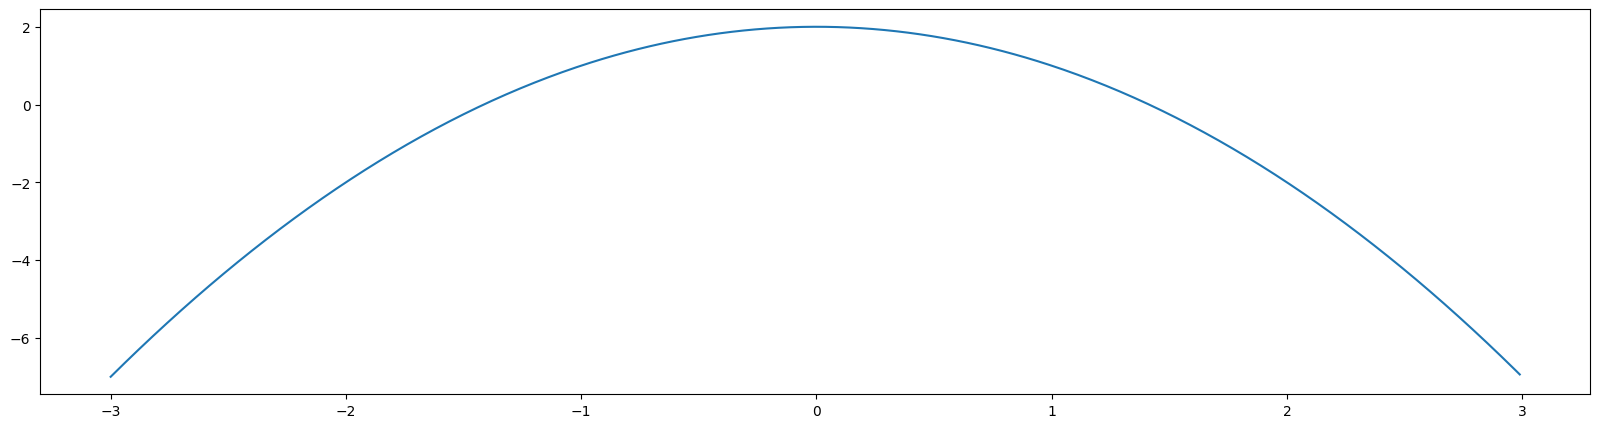

In [52]:
x = np.arange(-3,3,0.01)
z = -1*x**2 + 2

plt.figure(figsize=(20,5))
plt.plot(x,z)
plt.show()

In [61]:
### Debug later and understand why we don't get 2
def hill_climbing(z):
    index = 200
    learning_rate = 1

    while index >= 0 and index<len(z):
        if z[index] < z[index+learning_rate]:
            index = index+learning_rate
        if z[index] < z[index-learning_rate]:
            index = index-learning_rate
        return z[index]
    return z[index]

In [62]:
hill_climbing(z)

1.0198999999999152

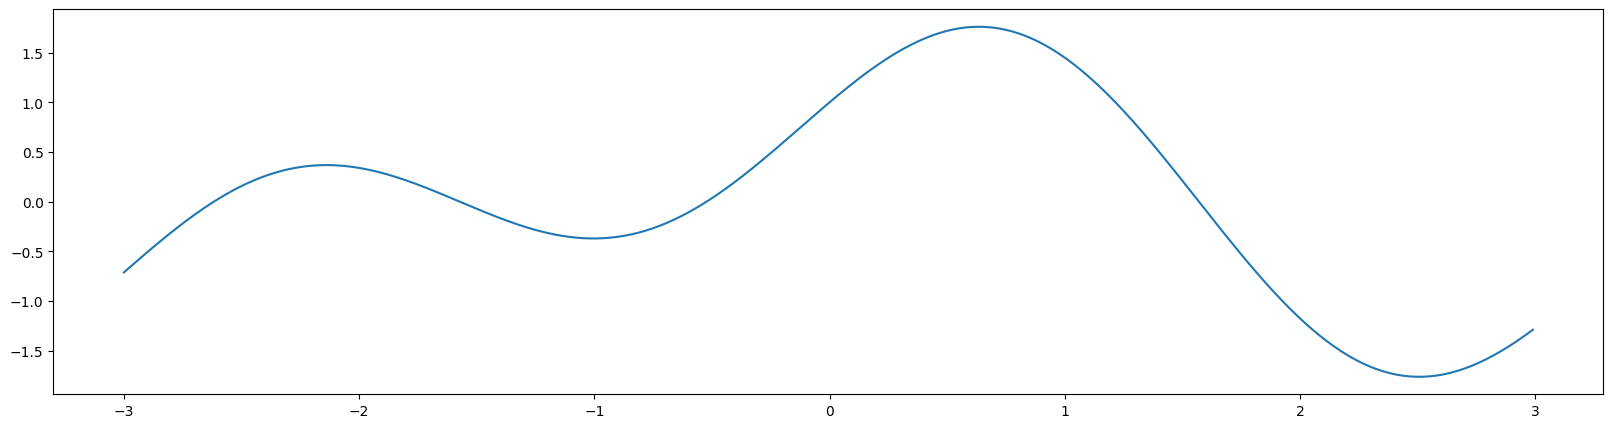

In [13]:
y = np.cos(x) + np.sin(2*x)

plt.figure(figsize=(20,5))
plt.plot(x,y)
plt.show()

In [71]:
def hill_climbing(y):
    iterations = 20
    maxima_ = float(-inf)

    for i in range(iterations):
        index = random.randint(len(y))
        learning_rate = 5

        while index < len(y) and index >= 0:
            if y[index] < y[index+learning_rate]:
                index = index+learning_rate
            if y[index] < y[index-learning_rate]:
                index = index-learning_rate
            if y[index] > maxima_:
                maxima_ = y[index]

    return maxima_

In [72]:
hill_climbing(y)

1.527983177151421

### Fractional Knapsack
An optimisation problem where items can be fractionalised to fit the final bag of items.

**Consider the below example:**
| Objects | 1 | 2 | 3 | 4 | 5 | 6 | 7 |
|---|---|---|---|---|---|---|---|
Profit (P) | 10 | 15 | 7 | 8 | 9 | 4 | 5 |
Weight(w) | 1 | 3 | 5 | 4 | 1 | 3 | 2 |
Profit/Weight | 10 | 5 | 1.4 | 2 | 9 | 1.3 | 2.5 |

- W (Weight of the knapsack): 15
- n (no of items): 7
- What is the maximum profit I can make from my knapsack?

## Dynamic Programming
This is a set of algorithms where we make recursive functions more efficient by avoiding recomputation of already computed solutions of the recursion. This algorithm is always get the global optimum is the most efficient way to solve a recursive problem whenever it can be applied.

**Note:** Most technical interviews will ask dynamic programming questions given the problem-solving nature of finding the repetitive sub-problem and the process of optimising its solution for runtime and space complexities.

### Fibonacci Numbers Pattern

In [91]:
## Fibonacci Sequence with normal recursion – O(2^n) | O(1)
def fibonacci(n):
    if n == 1:
        return 1
    if n == 2:
        return 1
    return  fibonacci(n-1) + fibonacci(n-2)

print(fibonacci(10))

55


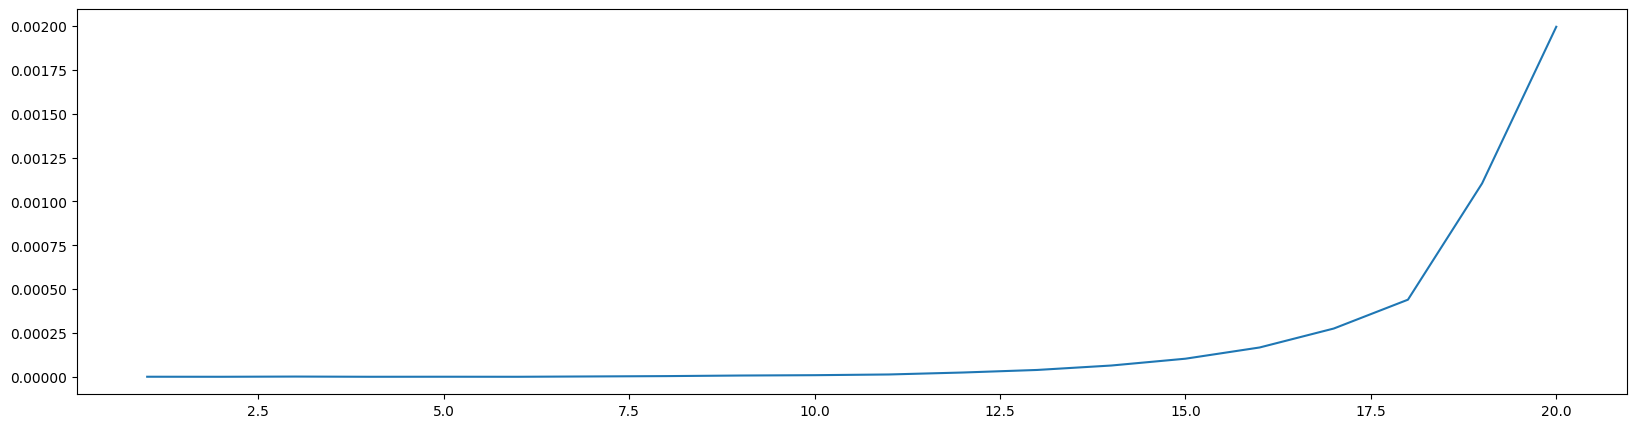

In [14]:
lst_n = list()
lst_fn = list()
lst_time = list()

for i in range(1,21):
    lst_n.append(i)
    start = time.time()
    lst_fn.append(fibonacci(i))
    end = time.time()
    lst_time.append(end-start)

plt.figure(figsize=(20,5))
plt.plot(lst_n,lst_time)

In [16]:
## Fibonacci with Top-Down Dynamic Programming – O(n) | O(n)
cache = dict()
def fibonacci(n):
    if n == 1:
        return 1
    if n == 2:
        return 1
    if n in cache.keys():
        return cache[n]
    cache[n] =  fibonacci(n-1) + fibonacci(n-2)
    return cache[n]

print(fibonacci(10))

55


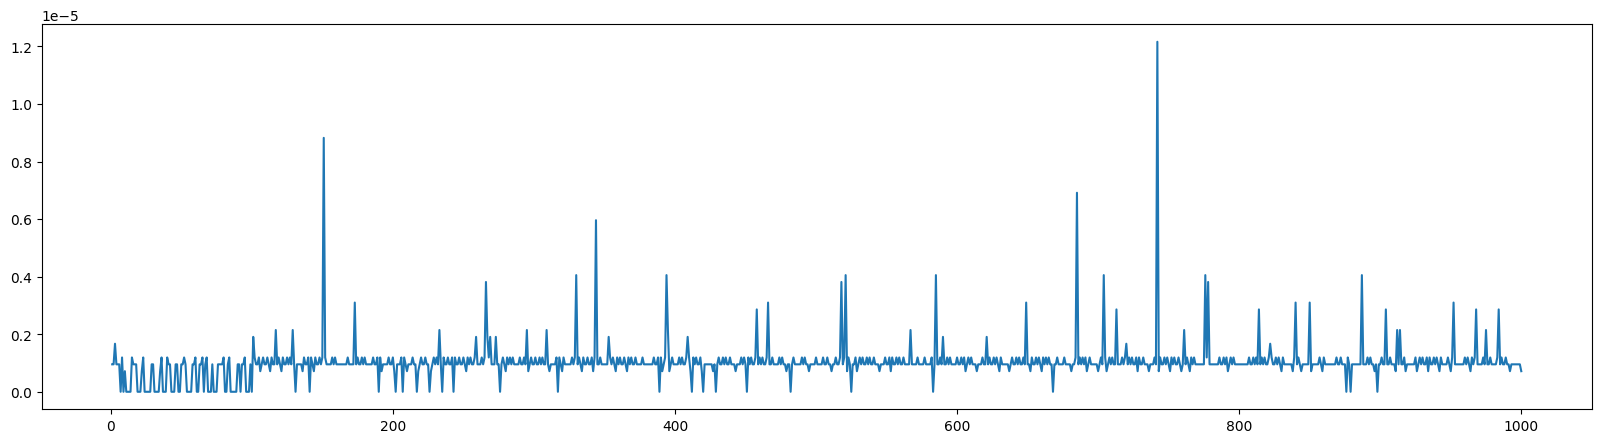

In [21]:
lst_n = list()
lst_fn = list()
lst_time = list()

for i in range(1,1001):
    lst_n.append(i)
    start = time.time()
    lst_fn.append(fibonacci(i))
    end = time.time()
    lst_time.append(end-start)

plt.figure(figsize=(20,5))
plt.plot(lst_n,lst_time)

In [22]:
def fibonacci(n):
    if n == 1:
        return 1
    if n == 2:
        return 1
    a = 1
    b = 1
    for i in range(2,n):
        c = a + b
        a = b
        b = c

    return b

print(fibonacci(10))

55


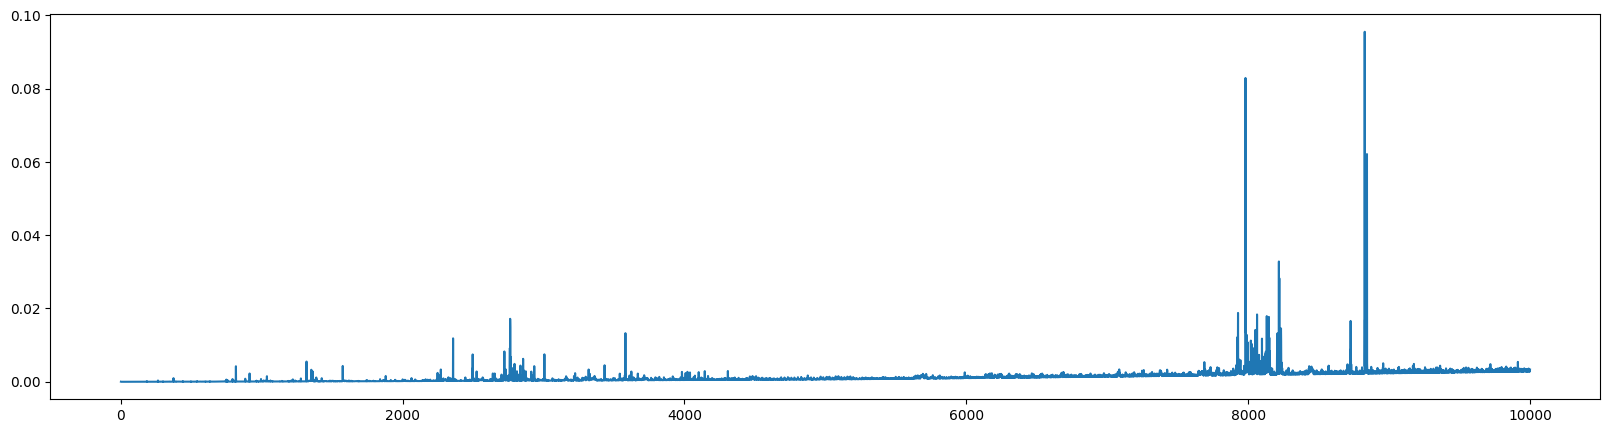

In [24]:
lst_n = list()
lst_fn = list()
lst_time = list()

for i in range(1,10001):
    lst_n.append(i)
    start = time.time()
    lst_fn.append(fibonacci(i))
    end = time.time()
    lst_time.append(end-start)

plt.figure(figsize=(20,5))
plt.plot(lst_n,lst_time)

### Challenge 1: Climbing Stairs ([Leetcode 70](https://leetcode.com/problems/climbing-stairs/description/))
You are climbing a staircase. It takes n steps to reach the top. Each time you can either climb 1 or 2 steps. In how many distinct ways can you climb to the top?

Example 1:
```
Input: n = 2
Output: 2
Explanation: There are two ways to climb to the top.
1. 1 step + 1 step
2. 2 
```
Example 2:
```
Input: n = 3
Output: 3
Explanation: There are three ways to climb to the top.
1. 1 step + 1 step + 1 step
2. 1 step + 2 steps
3. 2 steps + 1 step
```

In [40]:
cache = dict()
def climb(n):
    if n == 1:
        return 1
    if n == 2:
        return 2
    if n in cache.keys():
        return cache[n]
    
    cache[n] = climb(n-1) + climb(n-2)
    return cache[n]


print(climb(1000))

70330367711422815821835254877183549770181269836358732742604905087154537118196933579742249494562611733487750449241765991088186363265450223647106012053374121273867339111198139373125598767690091902245245323403501


In [42]:
def climb(n):
    if n == 1:
        return 1
    if n == 2:
        return 2
    a = 1
    b = 2
    for i in range(2,n):
        c = a + b
        a = b
        b = c

    return b


print(climb(10000))

5443837311356528133873426099375038013538918455469596702624771584120858286562234901708305154793896054117382267597802631738435958475111624143917470264295916992558633411790606304808979353147610846625907275936789915067796008830659796664196582493772180038144115884104248099798469648737533718002816376331778192794110136926275097950980071359671802381471066991264421477525447858767456896380800296226513311135992976272667944140010157580004351077746593580536250246170791805922641467900569075232189586814236784959388075642348375438634263963597073375626009896246266874611204173981940487506244370986865431562684718619562014612664223271181504036701882520531484587581719353352982783780035190252923951783668946766191795388471244102846393544948461445077876252952096188759727288922076853739647586954315917243453719361126374392633731300589616724805173798630636811500308839674958710261952463135244749950520419830518716832162328385979462724591977145462821839969578922379891219943177546970521613108109655995063829726125384

In [30]:
def climbStairs(n):
        a = 1
        b = 2
        if n == 1:
            return a
        if n == 2:
            return b
        for i in range(2,n):
            c = a + b
            a = b
            b = c
        return b

print(climbStairs(9))

55


### Challenge 2: House Robber ([Leetcode 198](https://leetcode.com/problems/house-robber/description/))
You are a professional robber planning to rob houses along a street. Each house has a certain amount of money stashed, the only constraint stopping you from robbing each of them is that adjacent houses have security systems connected and it will automatically contact the police if two adjacent houses were broken into on the same night. Given an integer array nums representing the amount of money of each house, return the maximum amount of money you can rob tonight without alerting the police.

Example 1:
```
Input: nums = [1,2,3,1]
Output: 4
Explanation: Rob house 1 (money = 1) and then rob house 3 (money = 3).
Total amount you can rob = 1 + 3 = 4.
```

Example 2:
```
Input: nums = [2,7,9,3,1]
Output: 12
Explanation: Rob house 1 (money = 2), rob house 3 (money = 9) and rob house 5 (money = 1).
Total amount you can rob = 2 + 9 + 1 = 12.
```

Example 3:
```
Input: nums = [2,1,1,2]
Output: 4
Explanation: Rob house 1 (money = 2) and rob house 4 (money = 2).
Total amount you can rob = 2 + 2 = 4.
```

In [54]:
cache = dict()

def rob(nums):
    if len(nums) == 1:
        return nums[0]
    if len(nums) == 2:
        return max(nums[0],nums[1])
    if tuple(nums) in cache.keys():
        return cache[tuple(nums)]
    cache[tuple(nums)] = max(nums[-1] + rob(nums[:-2]),rob(nums[:-1]))
    return cache[tuple(nums)]


print(rob([2,1,2,1,1,2]))

6


### Challenge 3: Standard Zero-One Knapsack

### Challenge 4: Target Sum (Zero-One Knapsack) – [Leetcode 494](https://leetcode.com/problems/target-sum/)
You are given an integer array nums and an integer target.
You want to build an expression out of nums by adding one of the symbols '+' and '-' before each integer in nums and then concatenate all the integers.

For example, if nums = [2, 1], you can add a '+' before 2 and a '-' before 1 and concatenate them to build the expression "+2-1".
Return the number of different expressions that you can build, which evaluates to target.

Example 1:
```
Input: nums = [1,1,1,1,1], target = 3
Output: 5
Explanation: There are 5 ways to assign symbols to make the sum of nums be target 3.
-1 + 1 + 1 + 1 + 1 = 3
+1 - 1 + 1 + 1 + 1 = 3
+1 + 1 - 1 + 1 + 1 = 3
+1 + 1 + 1 - 1 + 1 = 3
+1 + 1 + 1 + 1 - 1 = 3
```

Example 2:
```
Input: nums = [1], target = 1
Output: 1
```

Constraints:
```
1 <= nums.length <= 20
0 <= nums[i] <= 1000
0 <= sum(nums[i]) <= 1000
-1000 <= target <= 1000
```

### Challenge 5: Coin Change (Unbounded Knapsack)
You are given an integer array coins representing coins of different denominations and an integer amount representing a total amount of money.

Return the fewest number of coins that you need to make up that amount. If that amount of money cannot be made up by any combination of the coins, return -1.

You may assume that you have an infinite number of each kind of coin.

Example 1:
```
Input: coins = [1,2,5], amount = 11
Output: 3
Explanation: 11 = 5 + 5 + 1
```

Example 2:
```
Input: coins = [2], amount = 3
Output: -1
```

Example 3:
```
Input: coins = [1], amount = 0
Output: 0
```

Constraints:
```
1 <= coins.length <= 12
1 <= coins[i] <= 231 - 1
0 <= amount <= 104
```

In [ ]:
amount = 11
coins = [1,2,5]

if amount < coins[0]:
    return -1